Nome: Francisco Jerônimo da Silva Júnior <br>
Matrícula: 433399 <br>
Curso: Ciência da Computação 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df = pd.read_csv('Iris.csv')

In [25]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 2.1. Exiba a quantidade de amostras existente em cada classe.

In [26]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

### 2.2. Separe aleatoriamente 80% dos dados para treino (conjunto de treino) e 20% dos dados para teste (conjunto de teste). Para esta separação, use somente recursos do Python, Numpy ou Pandas. Não use o Scikit Learn para isso.

In [31]:
np.random.seed(42)
indices = np.random.permutation(len(df))
tam = int(0.2 * df.shape[0])
teste_indices = indices[:tam] # 30 indices
treino_indices = indices[tam:] # 120 indices

dados_treino, dados_teste = df.iloc[treino_indices], df.iloc[teste_indices]

### 2.3. Usando somente o conjunto de treino, mostre as médias dos valores de cada feature para cada classe.

In [41]:
dados_treino.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.250000,4.990000,3.440000,1.452500,0.242500
Iris-versicolor,76.707317,5.919512,2.770732,4.241463,1.321951
Iris-virginica,125.051282,6.533333,2.966667,5.520513,2.000000


### 2.4. Crie um algoritmo seu (sem usar aprendizado de máquina) para baseado nas médias das features calculadas no item 2.3. ou mesmo usando outras ideias suas, classificar corretamente as amostras do conjunto de teste. Aperfeçoe o seu algoritmo de forma a obter melhores resultados. Quanto por cento no conjunto de teste você conseguiu acertar corretamente o rótulo (classe) no seu melhor algoritmo, ou seja, qual a acurácia?

In [42]:
dados_treino.groupby('Species').min()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1,4.3,2.3,1.0,0.1
Iris-versicolor,51,4.9,2.0,3.0,1.0
Iris-virginica,101,4.9,2.2,4.5,1.4


In [43]:
dados_treino.groupby('Species').max()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,5.8,4.4,1.9,0.6
Iris-versicolor,100,7.0,3.4,5.1,1.8
Iris-virginica,150,7.7,3.8,6.7,2.5


In [9]:
dados_treino[(dados_treino.PetalWidthCm > 1.8) | (dados_treino.PetalLengthCm > 5.1) | (dados_treino.SepalLengthCm > 7) ]['Species'].value_counts()

Iris-virginica    32
Name: Species, dtype: int64

In [44]:
dados_treino[dados_treino.PetalLengthCm < 1.9]['Species'].value_counts()

Iris-setosa    38
Name: Species, dtype: int64

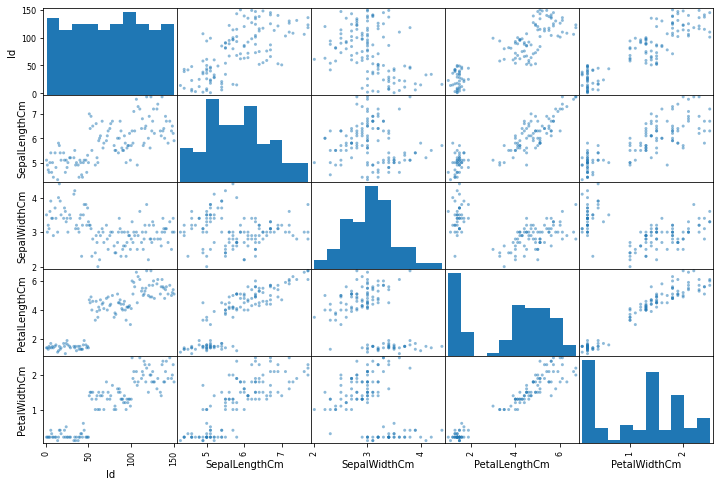

In [11]:
pd.plotting.scatter_matrix(dados_treino, figsize=(12, 8));

In [45]:
dados_treino.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.687962,-0.421089,0.879816,0.887430
SepalLengthCm,0.687962,1.000000,-0.097191,0.862183,0.801485
SepalWidthCm,-0.421089,-0.097191,1.000000,-0.422447,-0.357768
PetalLengthCm,0.879816,0.862183,-0.422447,1.000000,0.962432
PetalWidthCm,0.887430,0.801485,-0.357768,0.962432,1.000000


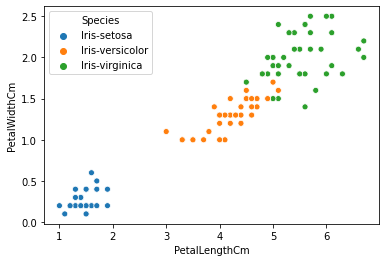

In [46]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=dados_treino);

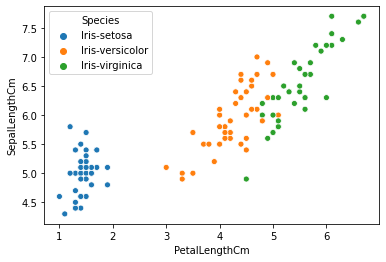

In [48]:
sns.scatterplot(x='PetalLengthCm', y='SepalLengthCm', hue='Species', data=dados_treino);

In [54]:
X_teste, y_teste = dados_teste.iloc[:, 1:5], dados_teste.iloc[:, 5]

In [55]:
def my_algorithm(data):
    lista = []
    for obj in data.values:
        if obj[2] < 1.9:
            lista.append('Iris-setosa')
        elif (obj[3] > 1.8) or (obj[2] > 5.1) or (obj[0] > 7):
            lista.append('Iris-virginica')
        else:
            lista.append('Iris-versicolor')
    return lista

In [50]:
y_teste.shape[0]

30

In [58]:
y_res = my_algorithm(X_teste)

In [60]:
(y_teste  == y_res)

73      True
18      True
118     True
78      True
76      True
31      True
64      True
141     True
68      True
82      True
110     True
12      True
36      True
9       True
19      True
56      True
104     True
69      True
55      True
132     True
29      True
127    False
26      True
128     True
131     True
145     True
108     True
143     True
45      True
30      True
Name: Species, dtype: bool

In [61]:
print('Acurácia:', ((y_teste  == y_res).sum()/y_teste.shape[0])  * 100)

Acurácia: 96.66666666666667
